## Loading Data

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
import numpy as np
import matplotlib.pyplot as plt
import cv2

X = pickle.load(open("X.pickle","rb"))
y = np.array(pickle.load(open("y.pickle","rb")))

X = X/255.0

## Building the Model

In [4]:
model = Sequential()
model.add(Conv2D(256,(3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

model.fit(X,y,batch_size=8,epochs=15,validation_split=0.1)

Epoch 1/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 166ms/step - accuracy: 0.4425 - loss: 1.2045 - val_accuracy: 0.5556 - val_loss: 0.7108
Epoch 2/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - accuracy: 0.5884 - loss: 0.6740 - val_accuracy: 0.4444 - val_loss: 1.1419
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - accuracy: 0.5966 - loss: 0.6828 - val_accuracy: 0.6111 - val_loss: 0.7716
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - accuracy: 0.7274 - loss: 0.5178 - val_accuracy: 0.5556 - val_loss: 0.7335
Epoch 5/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - accuracy: 0.8179 - loss: 0.4335 - val_accuracy: 0.6667 - val_loss: 0.5694
Epoch 6/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.9015 - loss: 0.2475 - val_accuracy: 0.6667 - val_loss: 0.7399
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - accuracy: 0.9018 - loss: 0.2517 - val_accuracy: 0.7778 - val_loss: 0.5064
Epoch 8/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.9201 - loss: 0.1880 - val_accuracy: 0.

## Prediction

In [5]:
if model.predict(X[15:16])[0][0] < 0.5:
    print("Non-Cancer")
else:
    print("Cancer")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Non-Cancer


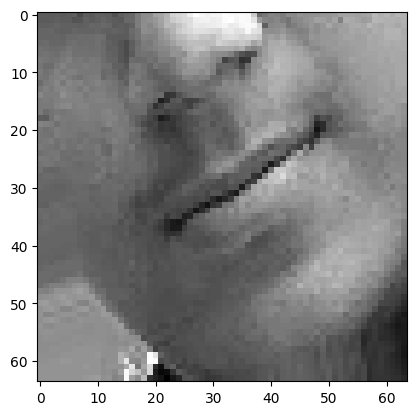

In [9]:
plt.imshow(X[15], cmap="gray")

## Model Summary

In [10]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 62, 62, 256)         │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 62, 62, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 31, 31, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 29, 29, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 29, 29, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │       3,211,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,412,101 (43.53 MB)

 Trainable params: 3,804,033 (14.51 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,608,068 (29.02 MB)

## Saving the Model

In [11]:
pickle_out = open("cnn_model.pickle","wb")
pickle.dump(model,pickle_out)
pickle_out.close()